In [1]:
from Data_Loader import Images_Dataset_folder
from utils import get_unique, soft_dice, hard_dice
from models.unet import Unet
import os
import torch

In [2]:
train_dir = r"D:\UNet\dataset\train"
val_dir = r"D:\UNet\dataset\val"
test_dir = r"D:\UNet\dataset\test"

train_images_path = os.path.join(train_dir, "JPEGImages")
train_labels_path = os.path.join(train_dir, "Annotations")

val_images_path = os.path.join(val_dir, "JPEGImages")
val_labels_path = os.path.join(val_dir, "Annotations")

test_images_path = os.path.join(test_dir, "JPEGImages")
test_labels_path = os.path.join(test_dir, "Annotations")

train_dataset = Images_Dataset_folder(train_images_path, train_labels_path)
val_dataset = Images_Dataset_folder(val_images_path, val_labels_path)


In [3]:
train_images_path

'D:\\UNet\\dataset\\train\\JPEGImages'

In [4]:
len(train_dataset)

280

In [5]:
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [6]:
"""
def train(
        model,
        device, 
        train_dataloader, 
        val_dataloader,
        loss_fn,
        evaluator,
        optimizer,
        epochs
    ):
"""
model = Unet(3)
device = "cuda" if torch.cuda.is_available() else "cpu"
train_datalaoader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False)
loss_fn = soft_dice()
evaluator = hard_dice()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 1


In [7]:
# Test the output shape of the model
x = torch.randn((1, 1, 498, 998))
model(x).shape

torch.Size([1, 3, 496, 992])

In [8]:
from train import train
train(model, device, train_datalaoader, val_dataloader, loss_fn, evaluator, optimizer, epochs)

In epoch 0, batch 0, the dice loss is 0.8570164442062378, the dice score is 0.9896475672721863
In epoch 0, batch 1, the dice loss is 0.8411800265312195, the dice score is 0.9789833426475525
In epoch 0, batch 2, the dice loss is 0.8163637518882751, the dice score is 0.6997808218002319
In epoch 0, batch 3, the dice loss is 0.8041533827781677, the dice score is 0.6696947813034058
In epoch 0, batch 4, the dice loss is 0.7848384976387024, the dice score is 0.636139988899231
In epoch 0, batch 5, the dice loss is 0.7770169973373413, the dice score is 0.6494741439819336
In epoch 0, batch 6, the dice loss is 0.769365131855011, the dice score is 0.6025476455688477
In epoch 0, batch 7, the dice loss is 0.7670702934265137, the dice score is 0.6097979545593262
In epoch 0, batch 8, the dice loss is 0.7584406137466431, the dice score is 0.5861828327178955
In epoch 0, batch 9, the dice loss is 0.7536703944206238, the dice score is 0.5650314092636108
In epoch 0, batch 10, the dice loss is 0.74424898624

KeyboardInterrupt: 

In [1]:
from Data_Loader import Images_Dataset_folder
from utils import get_unique, soft_dice_loss, hard_dice_score
from models.unet import Unet
import os
import torch
from utils import show_results


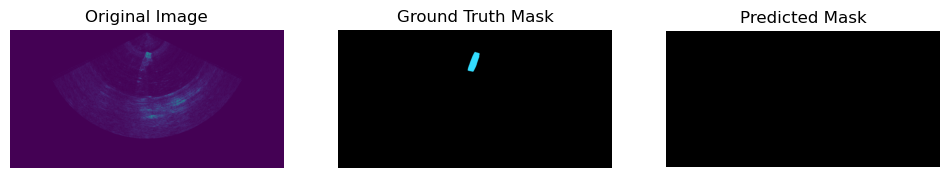

In [ ]:
dir = r"D:\UNet\dataset\test"
img_name = "img_000083"
model = Unet(3)
show_results(dir, img_name, model)